In [1]:
import torch
import torch.nn.functional as F
from torch import nn,optim
from torchvision import datasets,transforms
import os

In [2]:
data_dir = 'D:\cat_dog_data'

transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])
dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [3]:
images, labels = next(iter(dataloader))
images[0].shape

torch.Size([3, 224, 224])

torch.Size([224, 224])


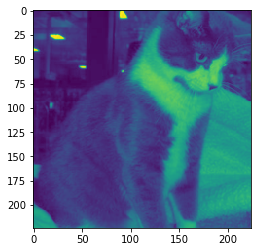

In [4]:
import matplotlib.pyplot as plt
plt.imshow(images[1][0])
print(images[1][0].shape)

### Neural Network Architecture

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device('cuda:0' if use_cuda else 'cpu')

In [6]:

class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(224*224, 514)
        self.fc2 = nn.Linear(514, 256)
        self.fc3 = nn.Linear(256, 2)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        
        return x

In [7]:
model = NeuralNet()
optim = optim.Adam(model.parameters(), lr=0.003)
criterion = nn.NLLLoss()

In [8]:
epochs = 5

for i in range(epochs):
    runnin_loss = 0
    for images, labels in dataloader:
        output = model(images)
        loss = criterion(outpus, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

RuntimeError: size mismatch, m1: [21504 x 224], m2: [50176 x 514] at C:\w\1\s\windows\pytorch\aten\src\TH/generic/THTensorMath.cpp:136

In [ ]:
torch.cuda.is_available()

In [ ]:
torch.cuda.device_count()